# Data preparation and storing
Preprocess images data and then store the data in database

North American Ethnicities
United States Census Bureau classification of ethinicites in the US. Currently the dataset is limited to four ethnic groups in the US: 
1) Asian American
2) Black and African American
3) Caucasian/White and Euroopean American
4) Hispanic and Latino American
The dataset is missing information on: 
1) Native American and Alaska Native
2) Native Hawaiian and other Pacific Islander

Asian Ethnicities
1) Korean
2) Japanese
3) Chinese
4) Indian

In [5]:
__author__ = "Joann H. Tang, PhD"
__copyright__ = "Copyright 2018"
__email__ = "eagtang2007@gmail.com"
__status__ = "Prototype"

In [6]:
from sklearn.utils import shuffle 
import numpy as np

import glob
import gc

from matplotlib import pyplot as plt
import cv2

import sqlite3
import pandas as pd

%matplotlib inline 

In [7]:
# Set data directory
path = "/Users/huizhentang/Documents/Repos/Pet-projects/Ethnicity-Classifier/Datasets/"

#### Resize all images to one size

Example images before resizing:


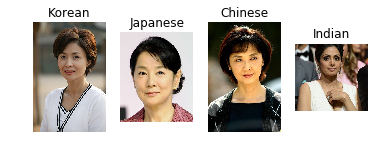

Example images after resizing:


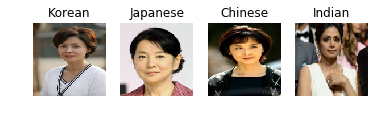

In [8]:
## # load and show example images
im_k = cv2.imread(path + '/Asian/Korean/' + 'example.jpg')
RGB_im_k = cv2.cvtColor(im_k, cv2.COLOR_BGR2RGB)
im_j = cv2.imread(path + '/Asian/Japanese/' + 'example.jpg')
RGB_im_j = cv2.cvtColor(im_j, cv2.COLOR_BGR2RGB)
im_c = cv2.imread(path + '/Asian/Chinese/' + 'example.jpg')
RGB_im_c = cv2.cvtColor(im_c, cv2.COLOR_BGR2RGB)
im_i = cv2.imread(path + '/Asian/Indian/' + 'example.jpg')
RGB_im_i = cv2.cvtColor(im_i, cv2.COLOR_BGR2RGB)

# Resize image to new size (width X height)
width = 128
height = 128
resized_im_k = cv2.resize(RGB_im_k, (width,height), interpolation = cv2.INTER_AREA)
resized_im_j = cv2.resize(RGB_im_j, (width,height), interpolation = cv2.INTER_AREA)
resized_im_c = cv2.resize(RGB_im_c, (width,height), interpolation = cv2.INTER_AREA)
resized_im_i = cv2.resize(RGB_im_i, (width,height), interpolation = cv2.INTER_AREA)


plt.subplot(1,4,1)
plt.imshow(RGB_im_k)
plt.title('Korean')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(RGB_im_j)
plt.title('Japanese')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(RGB_im_c)
plt.title('Chinese')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(RGB_im_i)
plt.title('Indian')
plt.axis('off')
print("Example images before resizing:")
plt.show()

plt.subplot(1,4,1)
plt.imshow(resized_im_k)
plt.title('Korean')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(resized_im_j)
plt.title('Japanese')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(resized_im_c)
plt.title('Chinese')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(resized_im_i)
plt.title('Indian')
plt.axis('off')
print("Example images after resizing:")
plt.show()

#### Extracting pixel values from resized images

In [9]:
def extract_pixel_values(prefix,y_label,width,height):
    """
    Resize image to the given width and height. 
    Then extract pixel values from the resized images. 
    
    Arguments:
    prefix -- The images for each class were labeled with a specific prefix
    y_label -- The number assigned to represent a specific ethnicity group
    width, height -- the width and height of the target image size
    
    Returns:
    X -- pixel values of images, 
         numpy array of shape(number_of_images,width,height,3)
    Y -- the ethnicity group label of images, 
         numpy array of shape(number_of_images)
    """

    ims = glob.glob(path + prefix + '*.*') #the images could be .jpg or .png

    Y = np.zeros((np.size(ims),1))
    Y[:] = int(y_label)
    X = np.zeros((np.size(ims),width,height,3)) 
    for k, im in enumerate(ims):
        img = cv2.imread(im, cv2.IMREAD_COLOR)
        if img is not None:
            img_resized = cv2.resize(img,(width,height))
            X[k] = np.asarray(img_resized)
    return X, Y

In [10]:
#Create sample data for each ethnic group
x0,y0=extract_pixel_values('Asian/Korean/', 0, width, height)
x1,y1=extract_pixel_values('Asian/Japanese/',1, width, height)
x2,y2=extract_pixel_values('Asian/Chinese/',2, width, height)
x3,y3=extract_pixel_values('Asian/Indian/',3, width, height)

In [11]:
#Print dimension to check images are properly processed. 
print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)

(1070, 128, 128, 3)
(1066, 128, 128, 3)
(1043, 128, 128, 3)
(1314, 128, 128, 3)


In [12]:
#Pool all subset together
x = np.concatenate((x0, x1, x2, x3), axis=0)
y = np.concatenate((y0, y1, y2, y3), axis=0)
print(x.shape)
print(y.shape)

(4493, 128, 128, 3)
(4493, 1)


#### Ensuring data casting to the right data type

In [13]:
x = (x).astype('float32')

#### Shuffle dataset

In [14]:
x, y = shuffle(x, y, random_state=42) 
print(x.shape)

(4493, 128, 128, 3)


In [36]:
d1 = len(x[:,0,0,0])*len(x[0,:,0,0])*len(x[0,0,:,0])
d2 = 3
x_re  = np.reshape(x, (d1,d2), order='C')
print(x_re.shape)

(73613312, 3)


In [37]:
df_x = pd.DataFrame(x_re, columns=['r','g','b'])
df_y = pd.DataFrame(y, columns=['label'])

#### Store data in database

In [38]:
#Connect to the database. 
conn = sqlite3.connect(path + 'ethface.db')
cur = conn.cursor() 

#Create tables to store the dataframes in the database. 
df_x.to_sql("ethface_asian_features", conn, if_exists="replace")    
df_y.to_sql("ethface_asian_labels", conn, if_exists="replace")   

#Disconnect to the database. 
cur.close() 
conn.close()